In [10]:
import pandas as pd
import glob
import csv
import numpy as np
from datetime import timedelta
from datetime import datetime
import collections
from collections import Counter
import statistics
import matplotlib.pyplot as plt
from datetime import datetime
from scipy import stats
from collections import OrderedDict

In [11]:
### LOAD DATAFRAMES

df1_all = pd.read_pickle('../Desktop/saved_dataframes/Store_subset_allprojects.pkl')
df1_success = pd.read_pickle('../Desktop/saved_dataframes/Store_subset_successprojects.pkl')
df1_fail = pd.read_pickle('../Desktop/saved_dataframes/Store_subset_failprojects.pkl')
print('Kickstarter US')
print('Current number of projects: ')
print(len(df1_all))
print('Current number of funded projects: ')
print(len(df1_success))
print('Current number of non-funded projects: ')
print(len(df1_fail))
print('Current number of zero-funded projects: ')
print(len(df1_fail.loc[df1_fail['usd_pledged'] == 0]))
print('Current probability of success: ')
print(len(df1_success) / len(df1_all))
print()

df2_all = pd.read_pickle('../Desktop/saved_dataframes/Foreign_store_subset_allprojects.pkl')
df2_success = pd.read_pickle('../Desktop/saved_dataframes/Foreign_store_subset_successprojects.pkl')
df2_fail = pd.read_pickle('../Desktop/saved_dataframes/Foreign_store_subset_failprojects.pkl')
print('Kickstarter International')
print('Current number of projects: ')
print(len(df2_all))
print('Current number of funded projects: ')
print(len(df2_success))
print('Current number of non-funded projects: ')
print(len(df2_fail))
print('Current number of zero-funded projects: ')
print(len(df2_fail.loc[df2_fail['usd_pledged'] == 0]))
print('Current probability of success: ')
print(len(df2_success) / len(df2_all))


Kickstarter US
Current number of projects: 
124450
Current number of funded projects: 
53165
Current number of non-funded projects: 
71154
Current number of zero-funded projects: 
15285
Current probability of success: 
0.4271996785857774

Kickstarter International
Current number of projects: 
21592
Current number of funded projects: 
8950
Current number of non-funded projects: 
12614
Current number of zero-funded projects: 
3397
Current probability of success: 
0.4145053723601334


In [12]:
### PLOT NUMBER OF PROJECTS US

# sort by date and get number of all projects per month
# key: Month/Year
# value: number of all projects
month_allprojects1 = df1_all.groupby(['Created At Month/Year']).size().to_dict() # orders in 'numerical order'
ordered_month_allprojects1 = dict(sorted(month_allprojects1.items(), key = lambda x:datetime.strptime(x[0], '%m/%Y'), reverse=False)) # orders in 'time order'

### PLOT NUMBER OF SUCCESSFUL PROJECTS

# sort by date and get number of successful projects per month
# key: Month/Year
# value: number of successful projects
month_successprojects1 = df1_success.groupby(['Created At Month/Year']).size().to_dict()
ordered_month_successprojects1 = dict(sorted(month_successprojects1.items(), key = lambda x:datetime.strptime(x[0], '%m/%Y'), reverse=False))

### NUMBER OF NON-SUCCESSFUL PROJECTS
# sort by date and get number of successful projects per month
# key: Month/Year
# value: number of successful projects
month_failprojects1 = df1_fail.groupby(['Created At Month/Year']).size().to_dict()
ordered_month_failprojects1 = dict(sorted(month_failprojects1.items(), key = lambda x:datetime.strptime(x[0], '%m/%Y'), reverse=False))


### PLOT PROBABILITY OF SUCCESS

# key: Month/Year
# value: probability of success per month
ordered_month_probsuccess1 = {}
for k in ordered_month_successprojects1.keys():
    # probability of success = number of successful projects per month / number of all projects per month
    ordered_month_probsuccess1[k] = ordered_month_successprojects1[k] / ordered_month_allprojects1[k]
    

In [13]:
### PLOT NUMBER OF PROJECTS INTERNATIONAL

# sort by date and get number of all projects per month
# key: Month/Year
# value: number of all projects
month_allprojects = df2_all.groupby(['Created At Month/Year']).size().to_dict() # orders in 'numerical order'
for k in month_allprojects1.keys():
    if k not in month_allprojects.keys():
        month_allprojects[k] = None
ordered_month_allprojects = dict(sorted(month_allprojects.items(), key = lambda x:datetime.strptime(x[0], '%m/%Y'), reverse=False)) # orders in 'time order'

### PLOT NUMBER OF SUCCESSFUL PROJECTS

# sort by date and get number of successful projects per month
# key: Month/Year
# value: number of successful projects
month_successprojects = df2_success.groupby(['Created At Month/Year']).size().to_dict()
for k in month_successprojects1.keys():
    if k not in month_successprojects.keys():
        month_successprojects[k] = None
ordered_month_successprojects = dict(sorted(month_successprojects.items(), key = lambda x:datetime.strptime(x[0], '%m/%Y'), reverse=False))

### NUMBER OF NON-SUCCESSFUL PROJECTS
# sort by date and get number of successful projects per month
# key: Month/Year
# value: number of successful projects
month_failprojects = df2_fail.groupby(['Created At Month/Year']).size().to_dict()
for k in month_failprojects1.keys():
    if k not in month_failprojects.keys():
        month_failprojects[k] = None
ordered_month_failprojects = dict(sorted(month_failprojects.items(), key = lambda x:datetime.strptime(x[0], '%m/%Y'), reverse=False))

### PLOT PROBABILITY OF SUCCESS

# key: Month/Year
# value: probability of success per month
ordered_month_probsuccess = {}
for k,v in ordered_month_successprojects.items():
    if v != None:
        # probability of success = number of successful projects per month / number of all projects per month
        ordered_month_probsuccess[k] = ordered_month_successprojects[k] / ordered_month_allprojects[k]
    else:
        ordered_month_probsuccess[k] = None
        
print('Note: Webscraper could not extract all projects post 2015 on Kickstarter')
print('Results post 2015 could be skewed positive.')

Note: Webscraper could not extract all projects post 2015 on Kickstarter
Results post 2015 could be skewed positive.


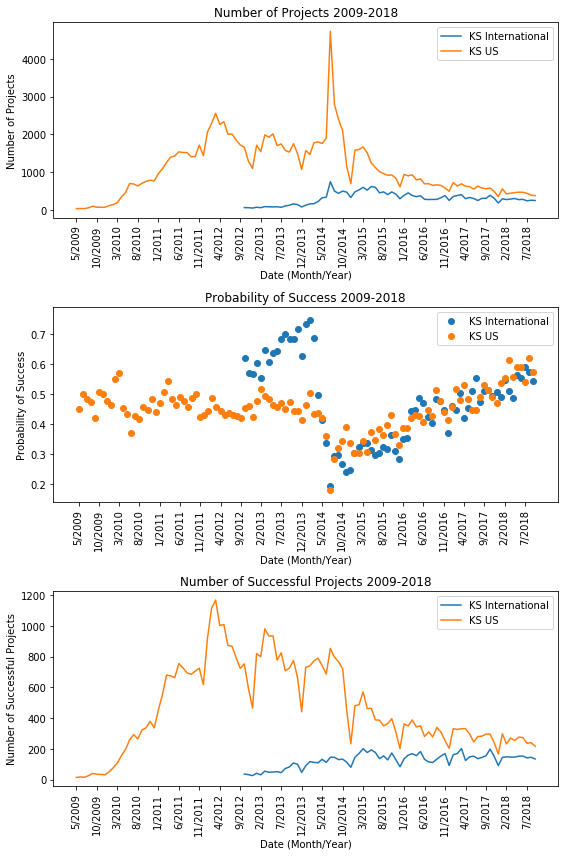

In [14]:
### US VS INTERNATIONAL

fig = plt.figure(figsize=(8, 12))
plt.subplot(3, 1, 1)
plt.plot(list(ordered_month_allprojects.keys()), list(ordered_month_allprojects.values()))
plt.plot(list(ordered_month_allprojects1.keys()), list(ordered_month_allprojects1.values()))
locs, labels = plt.xticks() 
plt.xticks(locs[0::5], rotation='vertical') # plot every 5 months
plt.xlabel('Date (Month/Year)')
plt.ylabel('Number of Projects')
plt.legend(['KS International', 'KS US'])
plt.title('Number of Projects 2009-2018')

plt.subplot(3, 1, 3)
plt.plot(list(ordered_month_successprojects.keys()), list(ordered_month_successprojects.values()))
plt.plot(list(ordered_month_successprojects1.keys()), list(ordered_month_successprojects1.values()))
locs, labs = plt.xticks() 
plt.xticks(locs[0::5], rotation='vertical')
plt.xlabel('Date (Month/Year)')
plt.ylabel('Number of Successful Projects')
plt.legend(['KS International', 'KS US'])
plt.title('Number of Successful Projects 2009-2018')

plt.subplot(3, 1, 2)
plt.scatter(list(ordered_month_probsuccess.keys()), list(ordered_month_probsuccess.values()))
plt.scatter(list(ordered_month_probsuccess1.keys()), list(ordered_month_probsuccess1.values()))
locs, labs = plt.xticks() 
plt.xticks(locs[0::5], rotation='vertical')
plt.xlabel('Date (Month/Year)')
plt.ylabel('Probability of Success')
plt.legend(['KS International', 'KS US'])
plt.title('Probability of Success 2009-2018')

plt.tight_layout()
plt.show()

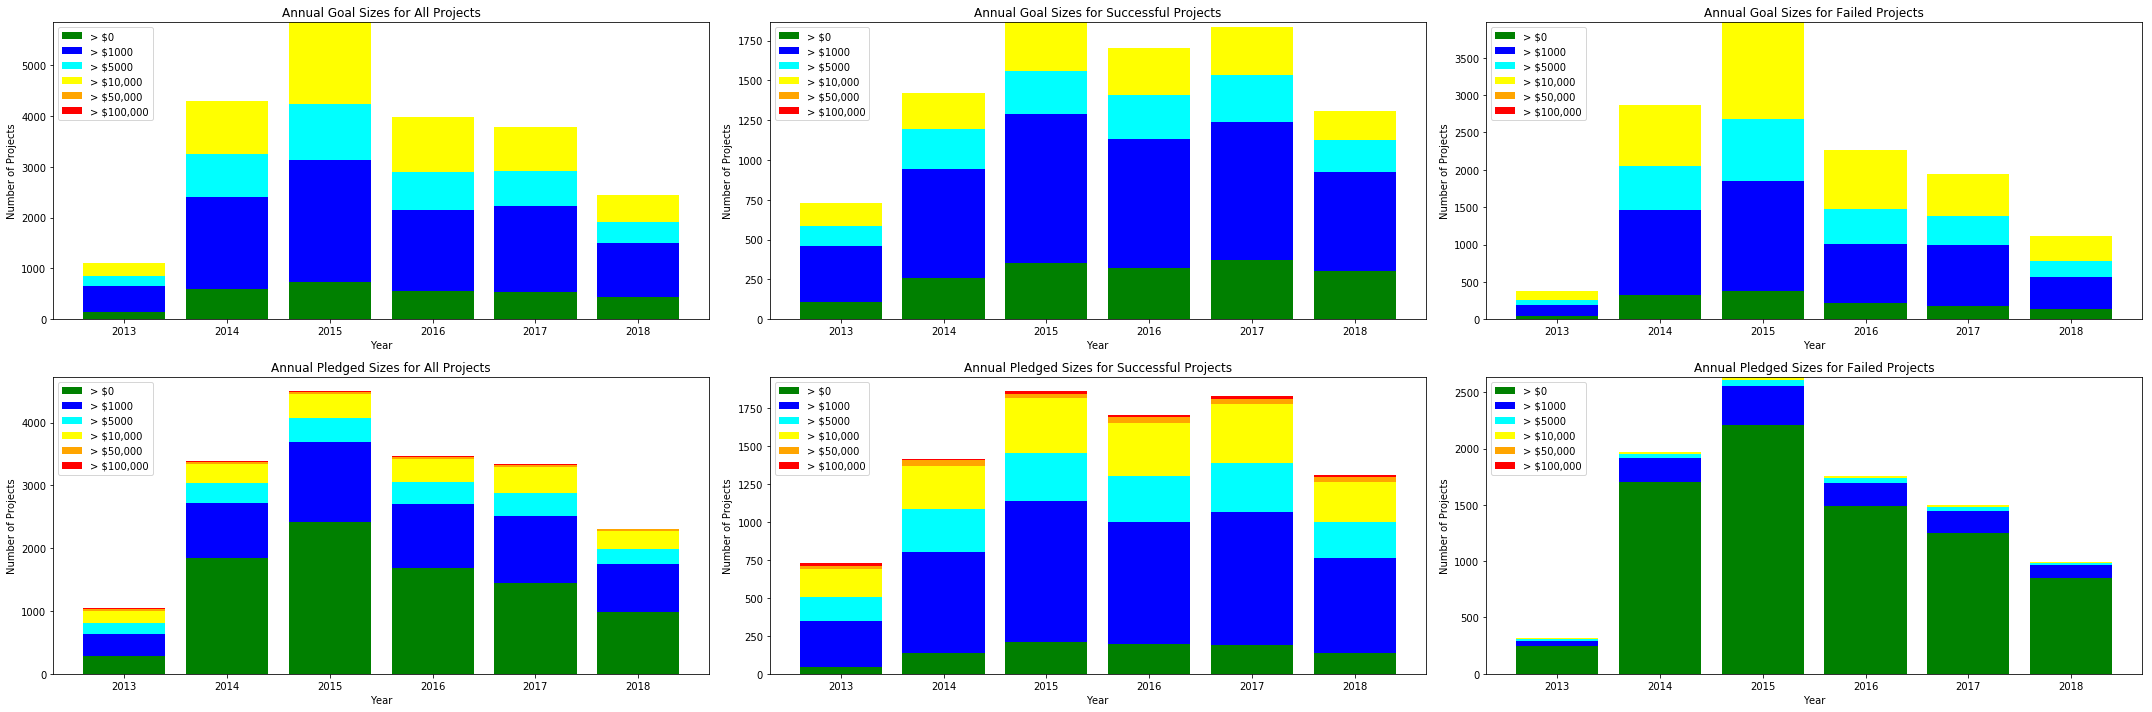

In [19]:
### TESTING DISTRIBUTION OF GOAL SIZES

df_lst = [df2_all, df2_success, df2_fail]
goal_titles = ['Annual Goal Sizes for All Projects', 'Annual Goal Sizes for Successful Projects', 'Annual Goal Sizes for Failed Projects']
pledged_titles = ['Annual Pledged Sizes for All Projects', 'Annual Pledged Sizes for Successful Projects', 'Annual Pledged Sizes for Failed Projects']

fig = plt.figure(figsize = (30,10))

for idx in range(len(df_lst)):
    curr_df = df_lst[idx]
    years = list(curr_df['Created At Year'].drop_duplicates())
    years.sort()
    years = years[1:len(years)]

    new_dict = {}
    new_dict_0 = {}
    new_dict_1000 = {}
    new_dict_5000 = {}
    new_dict_10000 = {}
    new_dict_50000 = {}
    new_dict_100000 = {}
    # build dictionaries by putting project in corresponding range
    for i in years:
        temp = curr_df.loc[curr_df['Created At Year'] == i]
        new_dict[i] = list(temp['goal']) # extract goal sizes from each year
        new_dict_0[i] = 0
        new_dict_1000[i] = 0
        new_dict_5000[i] = 0
        new_dict_10000[i] = 0
        new_dict_50000[i] = 0
        new_dict_100000[i] = 0    
    for k, v in new_dict.items():
        for goal in v:
            if goal > 0:
                new_dict_0[k] += 1
            if goal > 1000:
                new_dict_1000[k] += 1
            if goal > 5000:
                new_dict_5000[k] += 1
            if goal > 10000:
                new_dict_10000[k] += 1
            if goal > 50000:
                new_dict_50000[k] += 1
            if goal > 100000:
                new_dict_100000[k] += 1

    lst_0 = np.zeros([len(years)], dtype=int)
    lst_1000 = np.zeros([len(years)], dtype=int)
    lst_5000 = np.zeros([len(years)], dtype=int)
    lst_10000 = np.zeros([len(years)], dtype=int)
    lst_50000 = np.zeros([len(years)], dtype=int)
    lst_100000 = np.zeros([len(years)], dtype=int)
    for i in range(len(years)):
        lst_0[i] = new_dict_0[years[i]] - new_dict_1000[years[i]]
        lst_1000[i] = new_dict_1000[years[i]] - new_dict_5000[years[i]]
        lst_5000[i] = new_dict_5000[years[i]] - new_dict_10000[years[i]]
        lst_10000[i] = new_dict_10000[years[i]] - new_dict_50000[years[i]]
        lst_50000[i] = new_dict_50000[years[i]] - new_dict_100000[years[i]]
        lst_100000[i] = new_dict_100000[years[i]]

    ind = np.arange(len(years))
    plt.subplot(2, 3, idx+1)
    plt.bar(ind, lst_0, width=0.8, label='> $0', color='green')
    plt.bar(ind, lst_1000, width=0.8, label='> $1000', color='blue', bottom=lst_0)
    plt.bar(ind, lst_5000, width=0.8, label='> $5000', color='cyan', bottom=lst_0+lst_1000)
    plt.bar(ind, lst_10000, width=0.8, label='> $10,000', color='yellow', bottom=lst_0+lst_1000+lst_5000)
    plt.bar(ind, lst_50000, width=0.8, label='> $50,000', color='orange', bottom=lst_0+lst_1000+lst_5000+lst_10000)
    plt.bar(ind, lst_100000, width=0.8, label='> $100,000', color='red', bottom=lst_0+lst_1000+lst_5000+lst_10000+lst_50000)

    plt.xticks(ind, years)
    plt.ylabel("Number of Projects")
    plt.xlabel("Year")
    plt.legend(loc="upper left")
    plt.title(goal_titles[idx])
    
for idx in range(len(df_lst)):
    curr_df = df_lst[idx]
    years = list(curr_df['Created At Year'].drop_duplicates())
    years.sort()
    years = years[1:len(years)]
    
    new_dict = {}
    new_dict_0 = {}
    new_dict_1000 = {}
    new_dict_5000 = {}
    new_dict_10000 = {}
    new_dict_50000 = {}
    new_dict_100000 = {}
    # build dictionaries by putting project in corresponding range
    for i in years:
        temp = curr_df.loc[curr_df['Created At Year'] == i]
        new_dict[i] = list(temp['usd_pledged']) # extract goal sizes from each year
        new_dict_0[i] = 0
        new_dict_1000[i] = 0
        new_dict_5000[i] = 0
        new_dict_10000[i] = 0
        new_dict_50000[i] = 0
        new_dict_100000[i] = 0    
    for k, v in new_dict.items():
        for goal in v:
            if goal > 0:
                new_dict_0[k] += 1
            if goal > 1000:
                new_dict_1000[k] += 1
            if goal > 5000:
                new_dict_5000[k] += 1
            if goal > 10000:
                new_dict_10000[k] += 1
            if goal > 50000:
                new_dict_50000[k] += 1
            if goal > 100000:
                new_dict_100000[k] += 1

    lst_0 = np.zeros([len(years)], dtype=int)
    lst_1000 = np.zeros([len(years)], dtype=int)
    lst_5000 = np.zeros([len(years)], dtype=int)
    lst_10000 = np.zeros([len(years)], dtype=int)
    lst_50000 = np.zeros([len(years)], dtype=int)
    lst_100000 = np.zeros([len(years)], dtype=int)
    for i in range(len(years)):
        lst_0[i] = new_dict_0[years[i]] - new_dict_1000[years[i]]
        lst_1000[i] = new_dict_1000[years[i]] - new_dict_5000[years[i]]
        lst_5000[i] = new_dict_5000[years[i]] - new_dict_10000[years[i]]
        lst_10000[i] = new_dict_10000[years[i]] - new_dict_50000[years[i]]
        lst_50000[i] = new_dict_50000[years[i]] - new_dict_100000[years[i]]
        lst_100000[i] = new_dict_100000[years[i]]

    ind = np.arange(len(years))
    plt.subplot(2, 3, idx+4)
    plt.bar(ind, lst_0, width=0.8, label='> $0', color='green')
    plt.bar(ind, lst_1000, width=0.8, label='> $1000', color='blue', bottom=lst_0)
    plt.bar(ind, lst_5000, width=0.8, label='> $5000', color='cyan', bottom=lst_0+lst_1000)
    plt.bar(ind, lst_10000, width=0.8, label='> $10,000', color='yellow', bottom=lst_0+lst_1000+lst_5000)
    plt.bar(ind, lst_50000, width=0.8, label='> $50,000', color='orange', bottom=lst_0+lst_1000+lst_5000+lst_10000)
    plt.bar(ind, lst_100000, width=0.8, label='> $100,000', color='red', bottom=lst_0+lst_1000+lst_5000+lst_10000+lst_50000)

    plt.xticks(ind, years)
    plt.ylabel("Number of Projects")
    plt.xlabel("Year")
    plt.legend(loc="upper left")
    plt.title(pledged_titles[idx])

plt.tight_layout()
plt.show()

In [16]:
### US
    
### ALL PROJECTS

# key: month/year
# value: goal/pledged size
all_months = list(ordered_month_allprojects1.keys())
month_goal_dict = {}
month_pledged_dict = {}
month_pg_dict = {}
month_backers_dict = {}
month_duration_dict = {}
for i in all_months:
    temp = df1_all.loc[df1_all['Created At Month/Year'] == i]
    month_goal_dict[i] = np.array(temp['goal'])
    month_pledged_dict[i] = np.array(temp['usd_pledged'])
    month_pg_dict[i] = month_pledged_dict[i] / month_goal_dict[i]
    month_backers_dict[i] = np.array(temp['backers_count'])
    month_duration_dict[i] = np.array(temp['duration'])

# key: month/year
# value: mean/median goal/pledged
month_meangoal_dict = {} # monthly mean goal size
month_mediangoal_dict = {} # monthly median goal size
for k,v in month_goal_dict.items():
    month_meangoal_dict[k] = sum(v)/ len(v)
    month_mediangoal_dict[k] = statistics.median(v)
month_meanpledged_dict = {} # monthly mean pledged size
month_medianpledged_dict = {} # monthly median pledged size
for k,v in month_pledged_dict.items():
    month_meanpledged_dict[k] = sum(v)/ len(v)
    month_medianpledged_dict[k] = statistics.median(v)
month_meanpg_dict = {} # monthly mean p/g
month_medianpg_dict = {} # monthly median p/g
for k,v in month_pg_dict.items():
    month_meanpg_dict[k] = sum(v)/ len(v)
    month_medianpg_dict[k] = statistics.median(v)
month_meanbackers_dict = {} # monthly mean backers
month_medianbackers_dict = {} # monthly median backers
for k,v in month_backers_dict.items():
    month_meanbackers_dict[k] = sum(v)/ len(v)
    month_medianbackers_dict[k] = statistics.median(v)
month_meanduration_dict = {} # monthly mean duration
month_medianduration_dict = {} # monthly median duration
for k,v in month_duration_dict.items():
    month_meanduration_dict[k] = sum(v)/ len(v)
    month_medianduration_dict[k] = statistics.median(v)

# sort dictionary by time for mean/median dictionaries
ordered_month_meangoal_dict1 = dict(sorted(month_meangoal_dict.items(), key = lambda x:datetime.strptime(x[0], '%m/%Y'), reverse=False))
ordered_month_mediangoal_dict1 = dict(sorted(month_mediangoal_dict.items(), key = lambda x:datetime.strptime(x[0], '%m/%Y'), reverse=False))
ordered_month_meanpledged_dict1 = dict(sorted(month_meanpledged_dict.items(), key = lambda x:datetime.strptime(x[0], '%m/%Y'), reverse=False))
ordered_month_medianpledged_dict1 = dict(sorted(month_medianpledged_dict.items(), key = lambda x:datetime.strptime(x[0], '%m/%Y'), reverse=False))
ordered_month_meanpg_dict1 = dict(sorted(month_meanpg_dict.items(), key = lambda x:datetime.strptime(x[0], '%m/%Y'), reverse=False))
ordered_month_medianpg_dict1 = dict(sorted(month_medianpg_dict.items(), key = lambda x:datetime.strptime(x[0], '%m/%Y'), reverse=False))
ordered_month_meanbackers_dict1 = dict(sorted(month_meanbackers_dict.items(), key = lambda x:datetime.strptime(x[0], '%m/%Y'), reverse=False))
ordered_month_medianbackers_dict1 = dict(sorted(month_medianbackers_dict.items(), key = lambda x:datetime.strptime(x[0], '%m/%Y'), reverse=False))
ordered_month_meanduration_dict1 = dict(sorted(month_meanduration_dict.items(), key = lambda x:datetime.strptime(x[0], '%m/%Y'), reverse=False))
ordered_month_medianduration_dict1 = dict(sorted(month_medianduration_dict.items(), key = lambda x:datetime.strptime(x[0], '%m/%Y'), reverse=False))


# --------------------------------------------------
# --------------------------------------------------

### SUCCESSFUL PROJECTS

# key: month/year
# value: goal/pledged size
success_months = list(ordered_month_successprojects1.keys())
success_month_goal_dict = {}
success_month_pledged_dict = {}
success_month_pg_dict = {}
success_month_backers_dict = {}
success_month_duration_dict = {}
for i in success_months:
    temp = df1_success.loc[df1_success['Created At Month/Year'] == i]
    success_month_goal_dict[i] = np.array(temp['goal'])
    success_month_pledged_dict[i] = np.array(temp['usd_pledged'])
    success_month_pg_dict[i] = success_month_pledged_dict[i] / success_month_goal_dict[i]
    success_month_backers_dict[i] = np.array(temp['backers_count'])
    success_month_duration_dict[i] = np.array(temp['duration'])

# key: month/year
# value: mean/median goal/pledged
success_month_meangoal_dict = {} # monthly mean goal size
success_month_mediangoal_dict = {} # monthly median goal size
for k,v in success_month_goal_dict.items():
    success_month_meangoal_dict[k] = sum(v)/ len(v)
    success_month_mediangoal_dict[k] = statistics.median(v)
success_month_meanpledged_dict = {} # monthly mean pledged size
success_month_medianpledged_dict = {} # monthly median pledged size
for k,v in success_month_pledged_dict.items():
    success_month_meanpledged_dict[k] = sum(v)/ len(v)
    success_month_medianpledged_dict[k] = statistics.median(v)
success_month_meanpg_dict = {} # monthly mean p/g
success_month_medianpg_dict = {} # monthly median p/g
for k,v in success_month_pg_dict.items():
    success_month_meanpg_dict[k] = sum(v)/ len(v)
    success_month_medianpg_dict[k] = statistics.median(v)
success_month_meanbackers_dict = {} # monthly mean backers
success_month_medianbackers_dict = {} # monthly median backers
for k,v in success_month_backers_dict.items():
    success_month_meanbackers_dict[k] = sum(v)/ len(v)
    success_month_medianbackers_dict[k] = statistics.median(v)
success_month_meanduration_dict = {} # monthly mean duration
success_month_medianduration_dict = {} # monthly median duration
for k,v in success_month_duration_dict.items():
    success_month_meanduration_dict[k] = sum(v)/ len(v)
    success_month_medianduration_dict[k] = statistics.median(v)
    
# sort dictionary by time for mean/median dictionaries
success_ordered_month_meangoal_dict1 = dict(sorted(success_month_meangoal_dict.items(), key = lambda x:datetime.strptime(x[0], '%m/%Y'), reverse=False))
success_ordered_month_mediangoal_dict1 = dict(sorted(success_month_mediangoal_dict.items(), key = lambda x:datetime.strptime(x[0], '%m/%Y'), reverse=False))
success_ordered_month_meanpledged_dict1 = dict(sorted(success_month_meanpledged_dict.items(), key = lambda x:datetime.strptime(x[0], '%m/%Y'), reverse=False))
success_ordered_month_medianpledged_dict1 = dict(sorted(success_month_medianpledged_dict.items(), key = lambda x:datetime.strptime(x[0], '%m/%Y'), reverse=False))
success_ordered_month_meanpg_dict1 = dict(sorted(success_month_meanpg_dict.items(), key = lambda x:datetime.strptime(x[0], '%m/%Y'), reverse=False))
success_ordered_month_medianpg_dict1 = dict(sorted(success_month_medianpg_dict.items(), key = lambda x:datetime.strptime(x[0], '%m/%Y'), reverse=False))
success_ordered_month_meanbackers_dict1 = dict(sorted(success_month_meanbackers_dict.items(), key = lambda x:datetime.strptime(x[0], '%m/%Y'), reverse=False))
success_ordered_month_medianbackers_dict1 = dict(sorted(success_month_medianbackers_dict.items(), key = lambda x:datetime.strptime(x[0], '%m/%Y'), reverse=False))
success_ordered_month_meanduration_dict1 = dict(sorted(success_month_meanduration_dict.items(), key = lambda x:datetime.strptime(x[0], '%m/%Y'), reverse=False))
success_ordered_month_medianduration_dict1 = dict(sorted(success_month_medianduration_dict.items(), key = lambda x:datetime.strptime(x[0], '%m/%Y'), reverse=False))

# --------------------------------------------------
# --------------------------------------------------

### NON-SUCCESSFUL PROJECTS

# key: month/year
# value: goal/pledged size
fail_months = list(ordered_month_failprojects1.keys())
fail_month_goal_dict = {}
fail_month_pledged_dict = {}
fail_month_pg_dict = {}
fail_month_backers_dict = {}
fail_month_duration_dict = {}
for i in fail_months:
    temp = df1_fail.loc[df1_fail['Created At Month/Year'] == i]
    fail_month_goal_dict[i] = np.array(temp['goal'])
    fail_month_pledged_dict[i] = np.array(temp['usd_pledged'])
    fail_month_pg_dict[i] = fail_month_pledged_dict[i] / fail_month_goal_dict[i]
    fail_month_backers_dict[i] = np.array(temp['backers_count'])
    fail_month_duration_dict[i] = np.array(temp['duration'])

# key: month/year
# value: mean/median goal/pledged
fail_month_meangoal_dict = {} # monthly mean goal size
fail_month_mediangoal_dict = {} # monthly median goal size
for k,v in fail_month_goal_dict.items():
    fail_month_meangoal_dict[k] = sum(v)/ len(v)
    fail_month_mediangoal_dict[k] = statistics.median(v)
fail_month_meanpledged_dict = {} # monthly mean pledged size
fail_month_medianpledged_dict = {} # monthly median pledged size
for k,v in fail_month_pledged_dict.items():
    fail_month_meanpledged_dict[k] = sum(v)/ len(v)
    fail_month_medianpledged_dict[k] = statistics.median(v)
fail_month_meanpg_dict = {} # monthly mean p/g
fail_month_medianpg_dict = {} # monthly median p/g
for k,v in fail_month_pg_dict.items():
    fail_month_meanpg_dict[k] = sum(v)/ len(v)
    fail_month_medianpg_dict[k] = statistics.median(v)
fail_month_meanbackers_dict = {} # monthly mean backers
fail_month_medianbackers_dict = {} # monthly median backers
for k,v in fail_month_backers_dict.items():
    fail_month_meanbackers_dict[k] = sum(v)/ len(v)
    fail_month_medianbackers_dict[k] = statistics.median(v)
fail_month_meanduration_dict = {} # monthly mean duration
fail_month_medianduration_dict = {} # monthly median duration
for k,v in fail_month_duration_dict.items():
    fail_month_meanduration_dict[k] = sum(v)/ len(v)
    fail_month_medianduration_dict[k] = statistics.median(v)

# sort dictionary by time for mean/median dictionaries
fail_ordered_month_meangoal_dict1 = dict(sorted(fail_month_meangoal_dict.items(), key = lambda x:datetime.strptime(x[0], '%m/%Y'), reverse=False))
fail_ordered_month_mediangoal_dict1 = dict(sorted(fail_month_mediangoal_dict.items(), key = lambda x:datetime.strptime(x[0], '%m/%Y'), reverse=False))
fail_ordered_month_meanpledged_dict1 = dict(sorted(fail_month_meanpledged_dict.items(), key = lambda x:datetime.strptime(x[0], '%m/%Y'), reverse=False))
fail_ordered_month_medianpledged_dict1 = dict(sorted(fail_month_medianpledged_dict.items(), key = lambda x:datetime.strptime(x[0], '%m/%Y'), reverse=False))
fail_ordered_month_meanpg_dict1 = dict(sorted(fail_month_meanpg_dict.items(), key = lambda x:datetime.strptime(x[0], '%m/%Y'), reverse=False))
fail_ordered_month_medianpg_dict1 = dict(sorted(fail_month_medianpg_dict.items(), key = lambda x:datetime.strptime(x[0], '%m/%Y'), reverse=False))
fail_ordered_month_meanbackers_dict1 = dict(sorted(fail_month_meanbackers_dict.items(), key = lambda x:datetime.strptime(x[0], '%m/%Y'), reverse=False))
fail_ordered_month_medianbackers_dict1 = dict(sorted(fail_month_medianbackers_dict.items(), key = lambda x:datetime.strptime(x[0], '%m/%Y'), reverse=False))
fail_ordered_month_meanduration_dict1 = dict(sorted(fail_month_meanduration_dict.items(), key = lambda x:datetime.strptime(x[0], '%m/%Y'), reverse=False))
fail_ordered_month_medianduration_dict1 = dict(sorted(fail_month_medianduration_dict.items(), key = lambda x:datetime.strptime(x[0], '%m/%Y'), reverse=False))


In [17]:
### INTERNATIONAL
    
### ALL PROJECTS

# key: month/year
# value: goal/pledged size
all_months = list(ordered_month_allprojects.keys())
month_goal_dict = {}
month_pledged_dict = {}
month_pg_dict = {}
month_backers_dict = {}
month_duration_dict = {}
for i in all_months:
    temp = df2_all.loc[df2_all['Created At Month/Year'] == i]
    month_goal_dict[i] = np.array(temp['goal'])
    month_pledged_dict[i] = np.array(temp['usd_pledged'])
    month_pg_dict[i] = month_pledged_dict[i] / month_goal_dict[i]
    month_backers_dict[i] = np.array(temp['backers_count'])
    month_duration_dict[i] = np.array(temp['duration'])

# key: month/year
# value: mean/median goal/pledged
month_meangoal_dict = {} # monthly mean goal size
month_mediangoal_dict = {} # monthly median goal size
for k,v in month_goal_dict.items():
    if len(v) == 0:
        month_meangoal_dict[k] = None
        month_mediangoal_dict[k] = None
    else:
        month_meangoal_dict[k] = sum(v)/ len(v)
        month_mediangoal_dict[k] = statistics.median(v)
month_meanpledged_dict = {} # monthly mean pledged size
month_medianpledged_dict = {} # monthly median pledged size
for k,v in month_pledged_dict.items():
    if len(v) == 0:
        month_meanpledged_dict[k] = None
        month_medianpledged_dict[k] = None
    else:
        month_meanpledged_dict[k] = sum(v)/ len(v)
        month_medianpledged_dict[k] = statistics.median(v)
month_meanpg_dict = {} # monthly mean p/g
month_medianpg_dict = {} # monthly median p/g
for k,v in month_pg_dict.items():
    if len(v) == 0:
        month_meanpg_dict[k] = None
        month_medianpg_dict[k] = None
    else:
        month_meanpg_dict[k] = sum(v)/ len(v)
        month_medianpg_dict[k] = statistics.median(v)
month_meanbackers_dict = {} # monthly mean backers
month_medianbackers_dict = {} # monthly median backers
for k,v in month_backers_dict.items():
    if len(v) == 0:
        month_meanbackers_dict[k] = None
        month_medianbackers_dict[k] = None
    else:
        month_meanbackers_dict[k] = sum(v)/ len(v)
        month_medianbackers_dict[k] = statistics.median(v)
month_meanduration_dict = {} # monthly mean duration
month_medianduration_dict = {} # monthly median duration
for k,v in month_duration_dict.items():
    if len(v) == 0:
        month_meanduration_dict[k] = None
        month_medianduration_dict[k] = None
    else:
        month_meanduration_dict[k] = sum(v)/ len(v)
        month_medianduration_dict[k] = statistics.median(v)

# sort dictionary by time for mean/median dictionaries
ordered_month_meangoal_dict = dict(sorted(month_meangoal_dict.items(), key = lambda x:datetime.strptime(x[0], '%m/%Y'), reverse=False))
ordered_month_mediangoal_dict = dict(sorted(month_mediangoal_dict.items(), key = lambda x:datetime.strptime(x[0], '%m/%Y'), reverse=False))
ordered_month_meanpledged_dict = dict(sorted(month_meanpledged_dict.items(), key = lambda x:datetime.strptime(x[0], '%m/%Y'), reverse=False))
ordered_month_medianpledged_dict = dict(sorted(month_medianpledged_dict.items(), key = lambda x:datetime.strptime(x[0], '%m/%Y'), reverse=False))
ordered_month_meanpg_dict = dict(sorted(month_meanpg_dict.items(), key = lambda x:datetime.strptime(x[0], '%m/%Y'), reverse=False))
ordered_month_medianpg_dict = dict(sorted(month_medianpg_dict.items(), key = lambda x:datetime.strptime(x[0], '%m/%Y'), reverse=False))
ordered_month_meanbackers_dict = dict(sorted(month_meanbackers_dict.items(), key = lambda x:datetime.strptime(x[0], '%m/%Y'), reverse=False))
ordered_month_medianbackers_dict = dict(sorted(month_medianbackers_dict.items(), key = lambda x:datetime.strptime(x[0], '%m/%Y'), reverse=False))
ordered_month_meanduration_dict = dict(sorted(month_meanduration_dict.items(), key = lambda x:datetime.strptime(x[0], '%m/%Y'), reverse=False))
ordered_month_medianduration_dict = dict(sorted(month_medianduration_dict.items(), key = lambda x:datetime.strptime(x[0], '%m/%Y'), reverse=False))


# --------------------------------------------------
# --------------------------------------------------

### SUCCESSFUL PROJECTS

# key: month/year
# value: goal/pledged size
success_months = list(ordered_month_successprojects.keys())
success_month_goal_dict = {}
success_month_pledged_dict = {}
success_month_pg_dict = {}
success_month_backers_dict = {}
success_month_duration_dict = {}
for i in success_months:
    temp = df2_success.loc[df2_success['Created At Month/Year'] == i]
    success_month_goal_dict[i] = np.array(temp['goal'])
    success_month_pledged_dict[i] = np.array(temp['usd_pledged'])
    success_month_pg_dict[i] = success_month_pledged_dict[i] / success_month_goal_dict[i]
    success_month_backers_dict[i] = np.array(temp['backers_count'])
    success_month_duration_dict[i] = np.array(temp['duration'])

# key: month/year
# value: mean/median goal/pledged
success_month_meangoal_dict = {} # monthly mean goal size
success_month_mediangoal_dict = {} # monthly median goal size
for k,v in success_month_goal_dict.items():
    if len(v) == 0:
        success_month_meangoal_dict[k] = None
        success_month_mediangoal_dict[k] = None
    else:
        success_month_meangoal_dict[k] = sum(v)/ len(v)
        success_month_mediangoal_dict[k] = statistics.median(v)
success_month_meanpledged_dict = {} # monthly mean pledged size
success_month_medianpledged_dict = {} # monthly median pledged size
for k,v in success_month_pledged_dict.items():
    if len(v) == 0:
        success_month_meanpledged_dict[k] = None
        success_month_medianpledged_dict[k] = None
    else:
        success_month_meanpledged_dict[k] = sum(v)/ len(v)
        success_month_medianpledged_dict[k] = statistics.median(v)
success_month_meanpg_dict = {} # monthly mean p/g
success_month_medianpg_dict = {} # monthly median p/g
for k,v in success_month_pg_dict.items():
    if len(v) == 0:
        success_month_meanpg_dict[k] = None
        success_month_medianpg_dict[k] = None
    else:
        success_month_meanpg_dict[k] = sum(v)/ len(v)
        success_month_medianpg_dict[k] = statistics.median(v)
success_month_meanbackers_dict = {} # monthly mean backers
success_month_medianbackers_dict = {} # monthly median backers
for k,v in success_month_backers_dict.items():
    if len(v) == 0:
        success_month_meanbackers_dict[k] = None
        success_month_medianbackers_dict[k] = None
    else:
        success_month_meanbackers_dict[k] = sum(v)/ len(v)
        success_month_medianbackers_dict[k] = statistics.median(v)
success_month_meanduration_dict = {} # monthly mean duration
success_month_medianduration_dict = {} # monthly median duration
for k,v in success_month_duration_dict.items():
    if len(v) == 0:
        success_month_meanduration_dict[k] = None
        success_month_medianduration_dict[k] = None
    else:
        success_month_meanduration_dict[k] = sum(v)/ len(v)
        success_month_medianduration_dict[k] = statistics.median(v)
    
# sort dictionary by time for mean/median dictionaries
success_ordered_month_meangoal_dict = dict(sorted(success_month_meangoal_dict.items(), key = lambda x:datetime.strptime(x[0], '%m/%Y'), reverse=False))
success_ordered_month_mediangoal_dict = dict(sorted(success_month_mediangoal_dict.items(), key = lambda x:datetime.strptime(x[0], '%m/%Y'), reverse=False))
success_ordered_month_meanpledged_dict = dict(sorted(success_month_meanpledged_dict.items(), key = lambda x:datetime.strptime(x[0], '%m/%Y'), reverse=False))
success_ordered_month_medianpledged_dict = dict(sorted(success_month_medianpledged_dict.items(), key = lambda x:datetime.strptime(x[0], '%m/%Y'), reverse=False))
success_ordered_month_meanpg_dict = dict(sorted(success_month_meanpg_dict.items(), key = lambda x:datetime.strptime(x[0], '%m/%Y'), reverse=False))
success_ordered_month_medianpg_dict = dict(sorted(success_month_medianpg_dict.items(), key = lambda x:datetime.strptime(x[0], '%m/%Y'), reverse=False))
success_ordered_month_meanbackers_dict = dict(sorted(success_month_meanbackers_dict.items(), key = lambda x:datetime.strptime(x[0], '%m/%Y'), reverse=False))
success_ordered_month_medianbackers_dict = dict(sorted(success_month_medianbackers_dict.items(), key = lambda x:datetime.strptime(x[0], '%m/%Y'), reverse=False))
success_ordered_month_meanduration_dict = dict(sorted(success_month_meanduration_dict.items(), key = lambda x:datetime.strptime(x[0], '%m/%Y'), reverse=False))
success_ordered_month_medianduration_dict = dict(sorted(success_month_medianduration_dict.items(), key = lambda x:datetime.strptime(x[0], '%m/%Y'), reverse=False))

# --------------------------------------------------
# --------------------------------------------------

### NON-SUCCESSFUL PROJECTS

# key: month/year
# value: goal/pledged size
fail_months = list(ordered_month_failprojects.keys())
fail_month_goal_dict = {}
fail_month_pledged_dict = {}
fail_month_pg_dict = {}
fail_month_backers_dict = {}
fail_month_duration_dict = {}
for i in fail_months:
    temp = df2_fail.loc[df2_fail['Created At Month/Year'] == i]
    fail_month_goal_dict[i] = np.array(temp['goal'])
    fail_month_pledged_dict[i] = np.array(temp['usd_pledged'])
    fail_month_pg_dict[i] = fail_month_pledged_dict[i] / fail_month_goal_dict[i]
    fail_month_backers_dict[i] = np.array(temp['backers_count'])
    fail_month_duration_dict[i] = np.array(temp['duration'])

# key: month/year
# value: mean/median goal/pledged
fail_month_meangoal_dict = {} # monthly mean goal size
fail_month_mediangoal_dict = {} # monthly median goal size
for k,v in fail_month_goal_dict.items():
    if len(v) == 0:
        fail_month_meangoal_dict[k] = None
        fail_month_mediangoal_dict[k] = None
    else:
        fail_month_meangoal_dict[k] = sum(v)/ len(v)
        fail_month_mediangoal_dict[k] = statistics.median(v)
fail_month_meanpledged_dict = {} # monthly mean pledged size
fail_month_medianpledged_dict = {} # monthly median pledged size
for k,v in fail_month_pledged_dict.items():
    if len(v) == 0:
        fail_month_meanpledged_dict[k] = None
        fail_month_medianpledged_dict[k] = None
    else:
        fail_month_meanpledged_dict[k] = sum(v)/ len(v)
        fail_month_medianpledged_dict[k] = statistics.median(v)
fail_month_meanpg_dict = {} # monthly mean p/g
fail_month_medianpg_dict = {} # monthly median p/g
for k,v in fail_month_pg_dict.items():
    if len(v) == 0:
        fail_month_meanpg_dict[k] = None
        fail_month_medianpg_dict[k] = None
    else:
        fail_month_meanpg_dict[k] = sum(v)/ len(v)
        fail_month_medianpg_dict[k] = statistics.median(v)
fail_month_meanbackers_dict = {} # monthly mean backers
fail_month_medianbackers_dict = {} # monthly median backers
for k,v in fail_month_backers_dict.items():
    if len(v) == 0:
        fail_month_meanbackers_dict[k] = None
        fail_month_medianbackers_dict[k] = None
    else:
        fail_month_meanbackers_dict[k] = sum(v)/ len(v)
        fail_month_medianbackers_dict[k] = statistics.median(v)
fail_month_meanduration_dict = {} # monthly mean duration
fail_month_medianduration_dict = {} # monthly median duration
for k,v in fail_month_duration_dict.items():
    if len(v) == 0:
        fail_month_meanduration_dict[k] = None
        fail_month_medianduration_dict[k] = None
    else:
        fail_month_meanduration_dict[k] = sum(v)/ len(v)
        fail_month_medianduration_dict[k] = statistics.median(v)

# sort dictionary by time for mean/median dictionaries
fail_ordered_month_meangoal_dict = dict(sorted(fail_month_meangoal_dict.items(), key = lambda x:datetime.strptime(x[0], '%m/%Y'), reverse=False))
fail_ordered_month_mediangoal_dict = dict(sorted(fail_month_mediangoal_dict.items(), key = lambda x:datetime.strptime(x[0], '%m/%Y'), reverse=False))
fail_ordered_month_meanpledged_dict = dict(sorted(fail_month_meanpledged_dict.items(), key = lambda x:datetime.strptime(x[0], '%m/%Y'), reverse=False))
fail_ordered_month_medianpledged_dict = dict(sorted(fail_month_medianpledged_dict.items(), key = lambda x:datetime.strptime(x[0], '%m/%Y'), reverse=False))
fail_ordered_month_meanpg_dict = dict(sorted(fail_month_meanpg_dict.items(), key = lambda x:datetime.strptime(x[0], '%m/%Y'), reverse=False))
fail_ordered_month_medianpg_dict = dict(sorted(fail_month_medianpg_dict.items(), key = lambda x:datetime.strptime(x[0], '%m/%Y'), reverse=False))
fail_ordered_month_meanbackers_dict = dict(sorted(fail_month_meanbackers_dict.items(), key = lambda x:datetime.strptime(x[0], '%m/%Y'), reverse=False))
fail_ordered_month_medianbackers_dict = dict(sorted(fail_month_medianbackers_dict.items(), key = lambda x:datetime.strptime(x[0], '%m/%Y'), reverse=False))
fail_ordered_month_meanduration_dict = dict(sorted(fail_month_meanduration_dict.items(), key = lambda x:datetime.strptime(x[0], '%m/%Y'), reverse=False))
fail_ordered_month_medianduration_dict = dict(sorted(fail_month_medianduration_dict.items(), key = lambda x:datetime.strptime(x[0], '%m/%Y'), reverse=False))


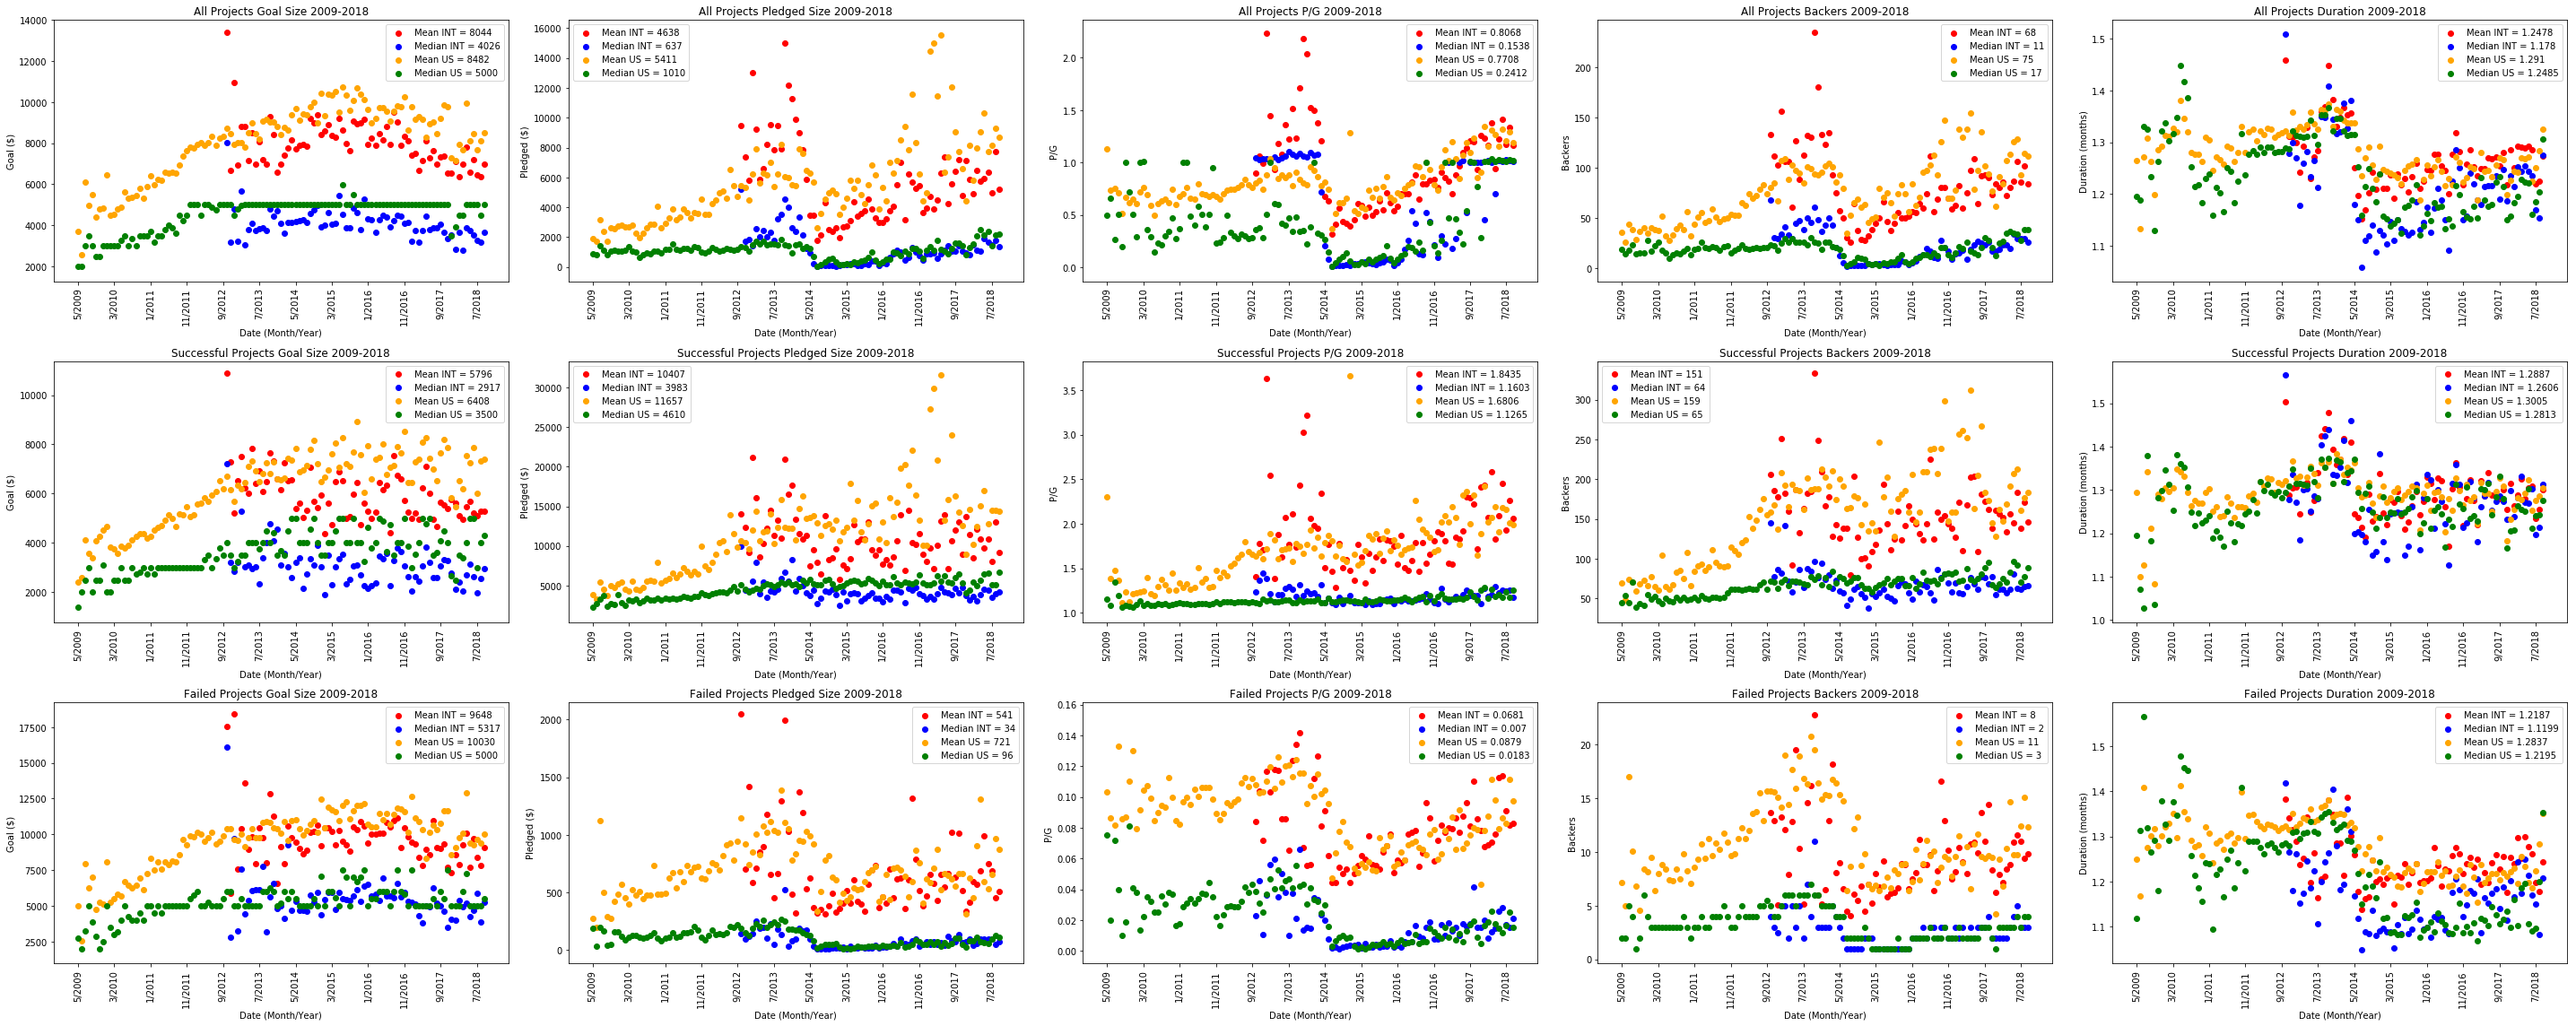

In [18]:
# PLOT GOAL SIZE
fig = plt.figure(figsize=(40, 16))
plt.subplot(3, 5, 1)
plt.scatter(list(ordered_month_meangoal_dict.keys()), list(ordered_month_meangoal_dict.values()), color = 'red')
plt.scatter(list(ordered_month_mediangoal_dict.keys()), list(ordered_month_mediangoal_dict.values()), color = 'blue')
plt.scatter(list(ordered_month_meangoal_dict1.keys()), list(ordered_month_meangoal_dict1.values()), color = 'orange')
plt.scatter(list(ordered_month_mediangoal_dict1.keys()), list(ordered_month_mediangoal_dict1.values()), color = 'green')

locs, labs = plt.xticks() 
plt.xticks(locs[0::10], rotation = 'vertical') 
plt.xlabel('Date (Month/Year)')
plt.ylabel('Goal ($)')

mean_goal = sum(df2_all['goal']) / len(df2_all['goal'])
median_goal = statistics.median(df2_all['goal'])
mean_goal1 = sum(df1_all['goal']) / len(df1_all['goal'])
median_goal1 = statistics.median(df1_all['goal'])
plt.legend(['Mean INT = ' + str(round(mean_goal)), 
            'Median INT = ' + str(round(median_goal)),
            'Mean US = ' + str(round(mean_goal1)), 
            'Median US = ' + str(round(median_goal1))])
plt.title('All Projects Goal Size 2009-2018')

# PLOT PLEDGED SIZE
plt.subplot(3, 5, 2)
plt.scatter(list(ordered_month_meanpledged_dict.keys()), list(ordered_month_meanpledged_dict.values()), color = 'red')
plt.scatter(list(ordered_month_medianpledged_dict.keys()), list(ordered_month_medianpledged_dict.values()), color = 'blue')
plt.scatter(list(ordered_month_meanpledged_dict1.keys()), list(ordered_month_meanpledged_dict1.values()), color = 'orange')
plt.scatter(list(ordered_month_medianpledged_dict1.keys()), list(ordered_month_medianpledged_dict1.values()), color = 'green')
locs, labs = plt.xticks() 
plt.xticks(locs[0::10], rotation = 'vertical') 
plt.xlabel('Date (Month/Year)')
plt.ylabel('Pledged ($)')
mean_pledged = sum(df2_all['usd_pledged']) / len(df2_all['usd_pledged'])
median_pledged = statistics.median(df2_all['usd_pledged'])
mean_pledged1 = sum(df1_all['usd_pledged']) / len(df1_all['usd_pledged'])
median_pledged1 = statistics.median(df1_all['usd_pledged'])
plt.legend(['Mean INT = ' + str(round(mean_pledged)), 
            'Median INT = ' + str(round(median_pledged)),
            'Mean US = ' + str(round(mean_pledged1)), 
            'Median US = ' + str(round(median_pledged1))])
plt.title('All Projects Pledged Size 2009-2018')

# PLOT P/G SIZE
plt.subplot(3, 5, 3)
plt.scatter(list(ordered_month_meanpg_dict.keys()), list(ordered_month_meanpg_dict.values()), color = 'red')
plt.scatter(list(ordered_month_medianpg_dict.keys()), list(ordered_month_medianpg_dict.values()), color = 'blue')
plt.scatter(list(ordered_month_meanpg_dict1.keys()), list(ordered_month_meanpg_dict1.values()), color = 'orange')
plt.scatter(list(ordered_month_medianpg_dict1.keys()), list(ordered_month_medianpg_dict1.values()), color = 'green')
locs, labs = plt.xticks() 
plt.xticks(locs[0::10], rotation = 'vertical') 
plt.xlabel('Date (Month/Year)')
plt.ylabel('P/G')
mean_pg = sum(df2_all['P/G']) / len(df2_all['P/G'])
median_pg = statistics.median(df2_all['P/G'])
mean_pg1 = sum(df1_all['P/G']) / len(df1_all['P/G'])
median_pg1 = statistics.median(df1_all['P/G'])
plt.legend(['Mean INT = ' + str(round(mean_pg, 4)), 
            'Median INT = ' + str(round(median_pg, 4)),
            'Mean US = ' + str(round(mean_pg1, 4)), 
            'Median US = ' + str(round(median_pg1, 4))])
plt.title('All Projects P/G 2009-2018')

# PLOT BACKERS SIZE
plt.subplot(3, 5, 4)
plt.scatter(list(ordered_month_meanbackers_dict.keys()), list(ordered_month_meanbackers_dict.values()), color = 'red')
plt.scatter(list(ordered_month_medianbackers_dict.keys()), list(ordered_month_medianbackers_dict.values()), color = 'blue')
plt.scatter(list(ordered_month_meanbackers_dict1.keys()), list(ordered_month_meanbackers_dict1.values()), color = 'orange')
plt.scatter(list(ordered_month_medianbackers_dict1.keys()), list(ordered_month_medianbackers_dict1.values()), color = 'green')
locs, labs = plt.xticks() 
plt.xticks(locs[0::10], rotation = 'vertical') 
plt.xlabel('Date (Month/Year)')
plt.ylabel('Backers')
mean_backers = sum(df2_all['backers_count']) / len(df2_all['backers_count'])
median_backers = statistics.median(df2_all['backers_count'])
mean_backers1 = sum(df1_all['backers_count']) / len(df1_all['backers_count'])
median_backers1 = statistics.median(df1_all['backers_count'])
plt.legend(['Mean INT = ' + str(round(mean_backers)), 
            'Median INT = ' + str(round(median_backers)),
            'Mean US = ' + str(round(mean_backers1)), 
            'Median US = ' + str(round(median_backers1))])
plt.title('All Projects Backers 2009-2018')

# PLOT DURATION SIZE
plt.subplot(3, 5, 5)
plt.scatter(list(ordered_month_meanduration_dict.keys()), list(ordered_month_meanduration_dict.values()), color = 'red')
plt.scatter(list(ordered_month_medianduration_dict.keys()), list(ordered_month_medianduration_dict.values()), color = 'blue')
plt.scatter(list(ordered_month_meanduration_dict1.keys()), list(ordered_month_meanduration_dict1.values()), color = 'orange')
plt.scatter(list(ordered_month_medianduration_dict1.keys()), list(ordered_month_medianduration_dict1.values()), color = 'green')
locs, labs = plt.xticks() 
plt.xticks(locs[0::10], rotation = 'vertical') 
plt.xlabel('Date (Month/Year)')
plt.ylabel('Duration (months)')
mean_duration = sum(df2_all['duration']) / len(df2_all['duration'])
median_duration = statistics.median(df2_all['duration'])
mean_duration1 = sum(df1_all['duration']) / len(df1_all['duration'])
median_duration1 = statistics.median(df1_all['duration'])
plt.legend(['Mean INT = ' + str(round(mean_duration, 4)), 
            'Median INT = ' + str(round(median_duration, 4)),
            'Mean US = ' + str(round(mean_duration1, 4)), 
            'Median US = ' + str(round(median_duration1, 4))])
plt.title('All Projects Duration 2009-2018')

# ------------------------------------------


# PLOT GOAL SIZE
plt.subplot(3, 5, 6)
plt.scatter(list(success_ordered_month_meangoal_dict.keys()), list(success_ordered_month_meangoal_dict.values()), color = 'red')
plt.scatter(list(success_ordered_month_mediangoal_dict.keys()), list(success_ordered_month_mediangoal_dict.values()), color = 'blue')
plt.scatter(list(success_ordered_month_meangoal_dict1.keys()), list(success_ordered_month_meangoal_dict1.values()), color = 'orange')
plt.scatter(list(success_ordered_month_mediangoal_dict1.keys()), list(success_ordered_month_mediangoal_dict1.values()), color = 'green')
locs, labs = plt.xticks() 
plt.xticks(locs[0::10], rotation = 'vertical') 
plt.xlabel('Date (Month/Year)')
plt.ylabel('Goal ($)')
success_mean_goal = sum(df2_success['goal']) / len(df2_success['goal'])
success_median_goal = statistics.median(df2_success['goal'])
success_mean_goal1 = sum(df1_success['goal']) / len(df1_success['goal'])
success_median_goal1 = statistics.median(df1_success['goal'])
plt.legend(['Mean INT = ' + str(round(success_mean_goal)), 
            'Median INT = ' + str(round(success_median_goal)),
            'Mean US = ' + str(round(success_mean_goal1)), 
            'Median US = ' + str(round(success_median_goal1))])
plt.title('Successful Projects Goal Size 2009-2018')

# PLOT PLEDGED SIZE
plt.subplot(3, 5, 7)
plt.scatter(list(success_ordered_month_meanpledged_dict.keys()), list(success_ordered_month_meanpledged_dict.values()), color = 'red')
plt.scatter(list(success_ordered_month_medianpledged_dict.keys()), list(success_ordered_month_medianpledged_dict.values()), color = 'blue')
plt.scatter(list(success_ordered_month_meanpledged_dict1.keys()), list(success_ordered_month_meanpledged_dict1.values()), color = 'orange')
plt.scatter(list(success_ordered_month_medianpledged_dict1.keys()), list(success_ordered_month_medianpledged_dict1.values()), color = 'green')

locs, labs = plt.xticks() 
plt.xticks(locs[0::10], rotation = 'vertical') 
plt.xlabel('Date (Month/Year)')
plt.ylabel('Pledged ($)')
success_mean_pledged = sum(df2_success['usd_pledged']) / len(df2_success['usd_pledged'])
success_median_pledged = statistics.median(df2_success['usd_pledged'])
success_mean_pledged1 = sum(df1_success['usd_pledged']) / len(df1_success['usd_pledged'])
success_median_pledged1 = statistics.median(df1_success['usd_pledged'])
plt.legend(['Mean INT = ' + str(round(success_mean_pledged)), 
            'Median INT = ' + str(round(success_median_pledged)),
            'Mean US = ' + str(round(success_mean_pledged1)), 
            'Median US = ' + str(round(success_median_pledged1))])
plt.title('Successful Projects Pledged Size 2009-2018')

# PLOT P/G SIZE
plt.subplot(3, 5, 8)
plt.scatter(list(success_ordered_month_meanpg_dict.keys()), list(success_ordered_month_meanpg_dict.values()), color = 'red')
plt.scatter(list(success_ordered_month_medianpg_dict.keys()), list(success_ordered_month_medianpg_dict.values()), color = 'blue')
plt.scatter(list(success_ordered_month_meanpg_dict1.keys()), list(success_ordered_month_meanpg_dict1.values()), color = 'orange')
plt.scatter(list(success_ordered_month_medianpg_dict1.keys()), list(success_ordered_month_medianpg_dict1.values()), color = 'green')
locs, labs = plt.xticks() 
plt.xticks(locs[0::10], rotation = 'vertical') 
plt.xlabel('Date (Month/Year)')
plt.ylabel('P/G')
success_mean_pg = sum(df2_success['P/G']) / len(df2_success['P/G'])
success_median_pg = statistics.median(df2_success['P/G'])
success_mean_pg1 = sum(df1_success['P/G']) / len(df1_success['P/G'])
success_median_pg1 = statistics.median(df1_success['P/G'])
plt.legend(['Mean INT = ' + str(round(success_mean_pg, 4)), 
            'Median INT = ' + str(round(success_median_pg, 4)),
            'Mean US = ' + str(round(success_mean_pg1, 4)), 
            'Median US = ' + str(round(success_median_pg1, 4))])
plt.title('Successful Projects P/G 2009-2018')

# PLOT BACKERS SIZE
plt.subplot(3, 5, 9)
plt.scatter(list(success_ordered_month_meanbackers_dict.keys()), list(success_ordered_month_meanbackers_dict.values()), color = 'red')
plt.scatter(list(success_ordered_month_medianbackers_dict.keys()), list(success_ordered_month_medianbackers_dict.values()), color = 'blue')
plt.scatter(list(success_ordered_month_meanbackers_dict1.keys()), list(success_ordered_month_meanbackers_dict1.values()), color = 'orange')
plt.scatter(list(success_ordered_month_medianbackers_dict1.keys()), list(success_ordered_month_medianbackers_dict1.values()), color = 'green')
locs, labs = plt.xticks() 
plt.xticks(locs[0::10], rotation = 'vertical') 
plt.xlabel('Date (Month/Year)')
plt.ylabel('Backers')
success_mean_backers = sum(df2_success['backers_count']) / len(df2_success['backers_count'])
success_median_backers = statistics.median(df2_success['backers_count'])
success_mean_backers1 = sum(df1_success['backers_count']) / len(df1_success['backers_count'])
success_median_backers1 = statistics.median(df1_success['backers_count'])
plt.legend(['Mean INT = ' + str(round(success_mean_backers)), 
            'Median INT = ' + str(round(success_median_backers)),
            'Mean US = ' + str(round(success_mean_backers1)), 
            'Median US = ' + str(round(success_median_backers1))])
plt.title('Successful Projects Backers 2009-2018')

# PLOT DURATION SIZE
plt.subplot(3, 5, 10)
plt.scatter(list(success_ordered_month_meanduration_dict.keys()), list(success_ordered_month_meanduration_dict.values()), color = 'red')
plt.scatter(list(success_ordered_month_medianduration_dict.keys()), list(success_ordered_month_medianduration_dict.values()), color = 'blue')
plt.scatter(list(success_ordered_month_meanduration_dict1.keys()), list(success_ordered_month_meanduration_dict1.values()), color = 'orange')
plt.scatter(list(success_ordered_month_medianduration_dict1.keys()), list(success_ordered_month_medianduration_dict1.values()), color = 'green')
locs, labs = plt.xticks() 
plt.xticks(locs[0::10], rotation = 'vertical') 
plt.xlabel('Date (Month/Year)')
plt.ylabel('Duration (months)')
success_mean_duration = sum(df2_success['duration']) / len(df2_success['duration'])
success_median_duration = statistics.median(df2_success['duration'])
success_mean_duration1 = sum(df1_success['duration']) / len(df1_success['duration'])
success_median_duration1 = statistics.median(df1_success['duration'])
plt.legend(['Mean INT = ' + str(round(success_mean_duration, 4)), 
            'Median INT = ' + str(round(success_median_duration, 4)),
            'Mean US = ' + str(round(success_mean_duration1, 4)), 
            'Median US = ' + str(round(success_median_duration1, 4))])
plt.title('Successful Projects Duration 2009-2018')

# ----------------------------------------

# PLOT GOAL SIZE
plt.subplot(3, 5, 11)
plt.scatter(list(fail_ordered_month_meangoal_dict.keys()), list(fail_ordered_month_meangoal_dict.values()), color = 'red')
plt.scatter(list(fail_ordered_month_mediangoal_dict.keys()), list(fail_ordered_month_mediangoal_dict.values()), color = 'blue')
plt.scatter(list(fail_ordered_month_meangoal_dict1.keys()), list(fail_ordered_month_meangoal_dict1.values()), color = 'orange')
plt.scatter(list(fail_ordered_month_mediangoal_dict1.keys()), list(fail_ordered_month_mediangoal_dict1.values()), color = 'green')
locs, labs = plt.xticks() 
plt.xticks(locs[0::10], rotation = 'vertical') 
plt.xlabel('Date (Month/Year)')
plt.ylabel('Goal ($)')
fail_mean_goal = sum(df2_fail['goal']) / len(df2_fail['goal'])
fail_median_goal = statistics.median(df2_fail['goal'])
fail_mean_goal1 = sum(df1_fail['goal']) / len(df1_fail['goal'])
fail_median_goal1 = statistics.median(df1_fail['goal'])
plt.legend(['Mean INT = ' + str(round(fail_mean_goal)), 
            'Median INT = ' + str(round(fail_median_goal)),
            'Mean US = ' + str(round(fail_mean_goal1)), 
            'Median US = ' + str(round(fail_median_goal1))])
plt.title('Failed Projects Goal Size 2009-2018')

# PLOT PLEDGED SIZE
plt.subplot(3, 5, 12)
plt.scatter(list(fail_ordered_month_meanpledged_dict.keys()), list(fail_ordered_month_meanpledged_dict.values()), color = 'red')
plt.scatter(list(fail_ordered_month_medianpledged_dict.keys()), list(fail_ordered_month_medianpledged_dict.values()), color = 'blue')
plt.scatter(list(fail_ordered_month_meanpledged_dict1.keys()), list(fail_ordered_month_meanpledged_dict1.values()), color = 'orange')
plt.scatter(list(fail_ordered_month_medianpledged_dict1.keys()), list(fail_ordered_month_medianpledged_dict1.values()), color = 'green')
locs, labs = plt.xticks() 
plt.xticks(locs[0::10], rotation = 'vertical') 
plt.xlabel('Date (Month/Year)')
plt.ylabel('Pledged ($)')
fail_mean_pledged = sum(df2_fail['usd_pledged']) / len(df2_fail['usd_pledged'])
fail_median_pledged = statistics.median(df2_fail['usd_pledged'])
fail_mean_pledged1 = sum(df1_fail['usd_pledged']) / len(df1_fail['usd_pledged'])
fail_median_pledged1 = statistics.median(df1_fail['usd_pledged'])
plt.legend(['Mean INT = ' + str(round(fail_mean_pledged)), 
            'Median INT = ' + str(round(fail_median_pledged)),
            'Mean US = ' + str(round(fail_mean_pledged1)), 
            'Median US = ' + str(round(fail_median_pledged1))])
plt.title('Failed Projects Pledged Size 2009-2018')

# PLOT P/G SIZE
plt.subplot(3, 5, 13)
plt.scatter(list(fail_ordered_month_meanpg_dict.keys()), list(fail_ordered_month_meanpg_dict.values()), color = 'red')
plt.scatter(list(fail_ordered_month_medianpg_dict.keys()), list(fail_ordered_month_medianpg_dict.values()), color = 'blue')
plt.scatter(list(fail_ordered_month_meanpg_dict1.keys()), list(fail_ordered_month_meanpg_dict1.values()), color = 'orange')
plt.scatter(list(fail_ordered_month_medianpg_dict1.keys()), list(fail_ordered_month_medianpg_dict1.values()), color = 'green')
locs, labs = plt.xticks() 
plt.xticks(locs[0::10], rotation = 'vertical') 
plt.xlabel('Date (Month/Year)')
plt.ylabel('P/G')
fail_mean_pg = sum(df2_fail['P/G']) / len(df2_fail['P/G'])
fail_median_pg = statistics.median(df2_fail['P/G'])
fail_mean_pg1 = sum(df1_fail['P/G']) / len(df1_fail['P/G'])
fail_median_pg1 = statistics.median(df1_fail['P/G'])
plt.legend(['Mean INT = ' + str(round(fail_mean_pg, 4)), 
            'Median INT = ' + str(round(fail_median_pg, 4)),
            'Mean US = ' + str(round(fail_mean_pg1, 4)), 
            'Median US = ' + str(round(fail_median_pg1, 4))])
plt.title('Failed Projects P/G 2009-2018')

# PLOT BACKERS SIZE
plt.subplot(3, 5, 14)
plt.scatter(list(fail_ordered_month_meanbackers_dict.keys()), list(fail_ordered_month_meanbackers_dict.values()), color = 'red')
plt.scatter(list(fail_ordered_month_medianbackers_dict.keys()), list(fail_ordered_month_medianbackers_dict.values()), color = 'blue')
plt.scatter(list(fail_ordered_month_meanbackers_dict1.keys()), list(fail_ordered_month_meanbackers_dict1.values()), color = 'orange')
plt.scatter(list(fail_ordered_month_medianbackers_dict1.keys()), list(fail_ordered_month_medianbackers_dict1.values()), color = 'green')
locs, labs = plt.xticks() 
plt.xticks(locs[0::10], rotation = 'vertical') 
plt.xlabel('Date (Month/Year)')
plt.ylabel('Backers')
fail_mean_backers = sum(df2_fail['backers_count']) / len(df2_fail['backers_count'])
fail_median_backers = statistics.median(df2_fail['backers_count'])
fail_mean_backers1 = sum(df1_fail['backers_count']) / len(df1_fail['backers_count'])
fail_median_backers1 = statistics.median(df1_fail['backers_count'])
plt.legend(['Mean INT = ' + str(round(fail_mean_backers)), 
            'Median INT = ' + str(round(fail_median_backers)),
            'Mean US = ' + str(round(fail_mean_backers1)), 
            'Median US = ' + str(round(fail_median_backers1))])
plt.title('Failed Projects Backers 2009-2018')

# PLOT DURATION SIZE
plt.subplot(3, 5, 15)
plt.scatter(list(fail_ordered_month_meanduration_dict.keys()), list(fail_ordered_month_meanduration_dict.values()), color = 'red')
plt.scatter(list(fail_ordered_month_medianduration_dict.keys()), list(fail_ordered_month_medianduration_dict.values()), color = 'blue')
plt.scatter(list(fail_ordered_month_meanduration_dict1.keys()), list(fail_ordered_month_meanduration_dict1.values()), color = 'orange')
plt.scatter(list(fail_ordered_month_medianduration_dict1.keys()), list(fail_ordered_month_medianduration_dict1.values()), color = 'green')
locs, labs = plt.xticks() 
plt.xticks(locs[0::10], rotation = 'vertical') 
plt.xlabel('Date (Month/Year)')
plt.ylabel('Duration (months)')
fail_mean_duration = sum(df2_fail['duration']) / len(df2_fail['duration'])
fail_median_duration = statistics.median(df2_fail['duration'])
fail_mean_duration1 = sum(df1_fail['duration']) / len(df1_fail['duration'])
fail_median_duration1 = statistics.median(df1_fail['duration'])
plt.legend(['Mean INT = ' + str(round(fail_mean_duration, 4)), 
            'Median INT = ' + str(round(fail_median_duration, 4)),
            'Mean US = ' + str(round(fail_mean_duration1, 4)), 
            'Median US = ' + str(round(fail_median_duration1, 4))])
plt.title('Failed Projects Duration 2009-2018')

plt.tight_layout()
plt.show()